In [1]:
!pip install bltk

##**Importing Libraries**


In [2]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [3]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [4]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [5]:
INPUT_FILE = "ecommerce_dataset.txt"
stopwords_list ="stopwords.txt"

##**Dataset Preparation and Cleaning**

In [6]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()


fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
  
    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords) 
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()
    


Label:  0
Sentence:  অনেকগুলা অরডার আছে একটু দেখবেন
Afert Tokenizing:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Truncating punctuation: ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
Truncating StopWords: ['অনেকগুলা', 'অরডার', 'একটু', 'দেখবেন']
***************************************************************************************
Label:  1
Sentence:  ভালোবাসা রইল ইভ্যালির প্রতি
Afert Tokenizing:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Truncating punctuation: ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
Truncating StopWords: ['ভালোবাসা', 'রইল', 'ইভ্যালির']
***************************************************************************************
Label:  0
Sentence:  আগের প্রডাক্ট ক্লিয়ার করেন তারাতাড়ি
Afert Tokenizing:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Truncating punctuation: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
Truncating StopWords: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'তারাতাড়ি']
***************************************************************************

Label:  1
Sentence:  যেমনটা চেয়েছিলাম তেমনটা পেয়েছি
Afert Tokenizing:  ['যেমনটা', 'চেয়েছিলাম', 'তেমনটা', 'পেয়েছি']
Truncating punctuation: ['যেমনটা', 'চেয়েছিলাম', 'তেমনটা', 'পেয়েছি']
Truncating StopWords: ['যেমনটা', 'চেয়েছিলাম', 'তেমনটা', 'পেয়েছি']
***************************************************************************************
Label:  1
Sentence:  আপনাদের প্রোডাক্ট ভাল।
Afert Tokenizing:  ['আপনাদের', 'প্রোডাক্ট', 'ভাল', '।']
Truncating punctuation: ['আপনাদের', 'প্রোডাক্ট', 'ভাল']
Truncating StopWords: ['আপনাদের', 'প্রোডাক্ট', 'ভাল']
***************************************************************************************
Label:  1
Sentence:  আপনাদের এই মাক্স গুলো অনেক দিন যাবত ব্যবহার করছি,খুবই ভাল কোয়ালিটি,পড়তেও আরাম
Afert Tokenizing:  ['আপনাদের', 'এই', 'মাক্স', 'গুলো', 'অনেক', 'দিন', 'যাবত', 'ব্যবহার', 'করছি,খুবই', 'ভাল', 'কোয়ালিটি,পড়তেও', 'আরাম']
Truncating punctuation: ['আপনাদের', 'এই', 'মাক্স', 'গুলো', 'অনেক', 'দিন', 'যাবত', 'ব্যবহার', 'করছি,খুবই', 'ভাল', 'কোয়ালিটি,প

Label:  1
Sentence:  গতকাল অর্ডার করেছিলাম আজকেই হাতে পেয়েছি এবং গুণগত মানের দিক দিয়ে বলতে হয় খুবই ভালো ধন্যবাদ জানাচ্ছি ও অনেক শুভকামনা রইলো।
Afert Tokenizing:  ['গতকাল', 'অর্ডার', 'করেছিলাম', 'আজকেই', 'হাতে', 'পেয়েছি', 'এবং', 'গুণগত', 'মানের', 'দিক', 'দিয়ে', 'বলতে', 'হয়', 'খুবই', 'ভালো', 'ধন্যবাদ', 'জানাচ্ছি', 'ও', 'অনেক', 'শুভকামনা', 'রইলো', '।']
Truncating punctuation: ['গতকাল', 'অর্ডার', 'করেছিলাম', 'আজকেই', 'হাতে', 'পেয়েছি', 'এবং', 'গুণগত', 'মানের', 'দিক', 'দিয়ে', 'বলতে', 'হয়', 'খুবই', 'ভালো', 'ধন্যবাদ', 'জানাচ্ছি', 'ও', 'অনেক', 'শুভকামনা', 'রইলো']
Truncating StopWords: ['গতকাল', 'অর্ডার', 'করেছিলাম', 'আজকেই', 'হাতে', 'পেয়েছি', 'গুণগত', 'মানের', 'দিক', 'খুবই', 'ভালো', 'ধন্যবাদ', 'জানাচ্ছি', 'শুভকামনা', 'রইলো']
***************************************************************************************
Label:  1
Sentence:  আশা করি ভবিষ্যতে পন্যের মান ঠিক রেখে আরো বহুদূর এগিয়ে যাবেন।শুভ কামনা
Afert Tokenizing:  ['আশা', 'করি', 'ভবিষ্যতে', 'পন্যের', 'মান', 'ঠিক', 'রেখে', 'আরো', 

Sentence:  পিকাবু এর মতো স্মার্ট সার্ভিস মনে হয় না কোনো ই-কমার্স আছে। ইলেকট্রনিক গ্যাজেটস এর পিকাবু বেস্ট
Afert Tokenizing:  ['পিকাবু', 'এর', 'মতো', 'স্মার্ট', 'সার্ভিস', 'মনে', 'হয়', 'না', 'কোনো', 'ই-কমার্স', 'আছে', '।', 'ইলেকট্রনিক', 'গ্যাজেটস', 'এর', 'পিকাবু', 'বেস্ট']
Truncating punctuation: ['পিকাবু', 'এর', 'মতো', 'স্মার্ট', 'সার্ভিস', 'মনে', 'হয়', 'না', 'কোনো', 'ই-কমার্স', 'আছে', 'ইলেকট্রনিক', 'গ্যাজেটস', 'এর', 'পিকাবু', 'বেস্ট']
Truncating StopWords: ['পিকাবু', 'স্মার্ট', 'সার্ভিস', 'না', 'ই-কমার্স', 'ইলেকট্রনিক', 'গ্যাজেটস', 'পিকাবু', 'বেস্ট']
***************************************************************************************
Label:  1
Sentence:  তাদের সার্ভিস আসলেই ভালো
Afert Tokenizing:  ['তাদের', 'সার্ভিস', 'আসলেই', 'ভালো']
Truncating punctuation: ['তাদের', 'সার্ভিস', 'আসলেই', 'ভালো']
Truncating StopWords: ['সার্ভিস', 'আসলেই', 'ভালো']
***************************************************************************************
Label:  0
Sentence:  এমন ফ্রড প্রতিনিয়তই হচ্ছে।
Af

Sentence:  খুব হতাশাজনক তাই আমি এখন অন্য কোথাও কেনাকাটা করছি।
Afert Tokenizing:  ['খুব', 'হতাশাজনক', 'তাই', 'আমি', 'এখন', 'অন্য', 'কোথাও', 'কেনাকাটা', 'করছি', '।']
Truncating punctuation: ['খুব', 'হতাশাজনক', 'তাই', 'আমি', 'এখন', 'অন্য', 'কোথাও', 'কেনাকাটা', 'করছি']
Truncating StopWords: ['হতাশাজনক', 'কোথাও', 'কেনাকাটা', 'করছি']
***************************************************************************************
Label:  0
Sentence:  আলীএক্সপ্রেস আর সস্তা নয়, অনেক আইটেম নরওয়ের চেয়ে বেশি দামি কিন্তু গুণমান সবসময় ভালো নয় তা কল্পনা করুন!!!
Afert Tokenizing:  ['আলীএক্সপ্রেস', 'আর', 'সস্তা', 'নয়', ',', 'অনেক', 'আইটেম', 'নরওয়ের', 'চেয়ে', 'বেশি', 'দামি', 'কিন্তু', 'গুণমান', 'সবসময়', 'ভালো', 'নয়', 'তা', 'কল্পনা', 'করুন!!', '!']
Truncating punctuation: ['আলীএক্সপ্রেস', 'আর', 'সস্তা', 'নয়', 'অনেক', 'আইটেম', 'নরওয়ের', 'চেয়ে', 'বেশি', 'দামি', 'কিন্তু', 'গুণমান', 'সবসময়', 'ভালো', 'নয়', 'তা', 'কল্পনা', 'করুন!!']
Truncating StopWords: ['আলীএক্সপ্রেস', 'সস্তা', 'নয়', 'আইটেম', 'নরওয়ের

Truncating punctuation: ['কি', 'বোলবো', 'অর্ডার', 'কোরলাম', 'সাদা', 'দিলো', 'ব্লু,এটা', 'ঠিকনা,এছারা', 'সব', 'ঠিক', 'আছে', 'প্যাকেটিং', 'ভাল', 'ছিল,নতুন', 'মাল', 'দিয়েছে,সাউন্ড', 'ভালোই।']
Truncating StopWords: ['বোলবো', 'অর্ডার', 'কোরলাম', 'সাদা', 'দিলো', 'ব্লু,এটা', 'ঠিকনা,এছারা', 'ঠিক', 'প্যাকেটিং', 'ভাল', 'ছিল,নতুন', 'মাল', 'দিয়েছে,সাউন্ড', 'ভালোই।']
***************************************************************************************
Label:  1
Sentence:  যে টেপ দেওয়া হয়েছে তা পূরাতন এক পাশে ময়লা লাগানো । অন্য পাশ ঠিক আছে
Afert Tokenizing:  ['যে', 'টেপ', 'দেওয়া', 'হয়েছে', 'তা', 'পূরাতন', 'এক', 'পাশে', 'ময়লা', 'লাগানো', '', '।', 'অন্য', 'পাশ', 'ঠিক', 'আছে']
Truncating punctuation: ['যে', 'টেপ', 'দেওয়া', 'হয়েছে', 'তা', 'পূরাতন', 'এক', 'পাশে', 'ময়লা', 'লাগানো', '', 'অন্য', 'পাশ', 'ঠিক', 'আছে']
Truncating StopWords: ['টেপ', 'পূরাতন', 'এক', 'পাশে', 'ময়লা', 'লাগানো', '', 'পাশ', 'ঠিক']
***************************************************************************************
Labe

Truncating punctuation: ['দাম', 'টা', 'আগের', 'থেকে', 'এটু', 'বেশি']
Truncating StopWords: ['দাম', 'টা', 'আগের', 'এটু', 'বেশি']
***************************************************************************************
Label:  1
Sentence:  "ভালভাবে পেলাম,ব্যবহার করা হয়নি"
Afert Tokenizing:  ['ভালভাবে', '"', 'পেলাম,ব্যবহার', 'করা', 'হয়নি', '"']
Truncating punctuation: ['ভালভাবে', 'পেলাম,ব্যবহার', 'করা', 'হয়নি']
Truncating StopWords: ['ভালভাবে', 'পেলাম,ব্যবহার', 'হয়নি']
***************************************************************************************
Label:  1
Sentence:  "অনেক ভালো, আবার নিবো"
Afert Tokenizing:  ['অনেক', '"', 'ভালো', ',', 'আবার', 'নিবো', '"']
Truncating punctuation: ['অনেক', 'ভালো', 'আবার', 'নিবো']
Truncating StopWords: ['ভালো', 'নিবো']
***************************************************************************************
Label:  1
Sentence:  প্যাকেজিং ভালো ছিলো সাথে ফ্রী ডেলিভারি
Afert Tokenizing:  ['প্যাকেজিং', 'ভালো', 'ছিলো', 'সাথে', 'ফ্রী', 'ডেলিভারি']
Truncating

Sentence:  আপনাদের কাছ কিছু জিজ্ঞেস করলে কোনো উত্তর দেন না কেনো
Afert Tokenizing:  ['আপনাদের', 'কাছ', 'কিছু', 'জিজ্ঞেস', 'করলে', 'কোনো', 'উত্তর', 'দেন', 'না', 'কেনো']
Truncating punctuation: ['আপনাদের', 'কাছ', 'কিছু', 'জিজ্ঞেস', 'করলে', 'কোনো', 'উত্তর', 'দেন', 'না', 'কেনো']
Truncating StopWords: ['আপনাদের', 'জিজ্ঞেস', 'না', 'কেনো']
***************************************************************************************
Label:  0
Sentence:  "এই ওডারটা এখন ও পেলাম না।
Afert Tokenizing:  ['এই', '"', 'ওডারটা', 'এখন', 'ও', 'পেলাম', 'না', '।']
Truncating punctuation: ['এই', 'ওডারটা', 'এখন', 'ও', 'পেলাম', 'না']
Truncating StopWords: ['ওডারটা', 'পেলাম', 'না']
***************************************************************************************
Label:  0
Sentence:  "কেউ বিশ্বাস করবেন না এরা প্রতারক
Afert Tokenizing:  ['কেউ', '"', 'বিশ্বাস', 'করবেন', 'না', 'এরা', 'প্রতারক']
Truncating punctuation: ['কেউ', 'বিশ্বাস', 'করবেন', 'না', 'এরা', 'প্রতারক']
Truncating StopWords: ['বিশ্বাস', 'না', 'প্রতা

Truncating StopWords: ['প্রিয়', 'দারাজ', 'খাগড়াছড়ির', 'ডেলিভারির', 'বয়', 'গুলো', 'মরছে', 'একটু', 'খোজ', 'দেখেন', 'গত', 'পরশু', 'প্রোডাক্স', 'ডেলিভারি', 'দেওয়ার', 'নাম', 'গন্ধ', 'নাই', '']
***************************************************************************************
Label:  0
Sentence:  অভিযোগ দিলে কাজ হয় না।
Afert Tokenizing:  ['অভিযোগ', 'দিলে', 'কাজ', 'হয়', 'না', '।']
Truncating punctuation: ['অভিযোগ', 'দিলে', 'কাজ', 'হয়', 'না']
Truncating StopWords: ['অভিযোগ', 'দিলে', 'না']
***************************************************************************************
Label:  0
Sentence:  এভাবে হয়রানি করা হলে ভোক্তা অধিকার আইনে কাষ্টমার হয়রানি করার অভিযোগ জানাতে বাধ্য হবো।
Afert Tokenizing:  ['এভাবে', 'হয়রানি', 'করা', 'হলে', 'ভোক্তা', 'অধিকার', 'আইনে', 'কাষ্টমার', 'হয়রানি', 'করার', 'অভিযোগ', 'জানাতে', 'বাধ্য', 'হবো', '।']
Truncating punctuation: ['এভাবে', 'হয়রানি', 'করা', 'হলে', 'ভোক্তা', 'অধিকার', 'আইনে', 'কাষ্টমার', 'হয়রানি', 'করার', 'অভিযোগ', 'জানাতে', 'বাধ্য', 'হবো']
T

Truncating StopWords: ['ফ্রেশ', 'না']
***************************************************************************************


In [7]:
xs

['অনেকগুলা অরডার একটু দেখবেন',
 'ভালোবাসা রইল ইভ্যালির',
 'আগের প্রডাক্ট ক্লিয়ার তারাতাড়ি',
 'ভাল লাগতেছে না',
 'দয়া একটু ভাই পাবো',
 'সঠিক তারিখে দিতেন অভিযোগ দিত না',
 'কমার্সের নামে আপনারা মানুষের সাথে করতেছে একদিন হিসাব আপনাদের কড়ায় ঘন্ডায়',
 'ফাইজলামি!!',
 'দীর্ঘ হায়াত কামনা',
 'ভাই অডার মত টাকা নাই স্বপ্নের খুবই প্রয়োজনীয় বাইকটা পাব না',
 'ভাই সামান্য গ্রোসারি আইটেম পারলেন না ৩ মাসে',
 'যুবকের স্বপ্ন বেঁচে পুরণ',
 'কথা মিল রাখলে গ্রাহক বারবে না কমবে আশা দ্রুত সমাদান ধন্যবাদ',
 'ভাই পন্য গুলো পাবো,,,,,',
 'Daraz মাসেই না কিনেছি বড় ছোট অর্ডার',
 'প্রডাক্ট গুলো পাওয়ার সম্ভাবনা ভাই',
 'খবর বার্তা নাই তাড়াতাড়ি ডেলিভারি দেন..',
 'আপনারা কখনো মানুষের আস্থা অর্জন পারবেন না ১০০%!!',
 'কাষ্টমারের ভোগান্তি কমিয়ে কথা অনুযায়ী করারও পরামর্শ রইলো',
 'ওয়াদা দিবেন না যেটা রক্ষা পারবেন না ধন্যবাদ',
 'সততা ব্যবসা সফলতা আসবে ',
 'ভালো ভালো রাখবেন গ্রাহক দের',
 'বেস্ট অব লাক',
 'এগিয়ে যাক ইভেলি আগামীর পথে স্বপ্ন পূরনে',
 'বাকি অর্ডার গুলো দেরি একটু দেওয়ার অনুরোধ করতেছি',
 'অর্ডার আসতে পারছে না যথাস

##**TF-IDF**

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও বাট পুরাই বাজে',
 '"আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি।অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫/৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি দিতে,,এখন এক এক বারও আসে না,,কারণ ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের টি-শার্ট দাম ৪৯৫ টাকা ঈদের বেড়ে ৫৯৫ টাকা সবচেয়ে বড় কথা এক সপ্তার কালার',
 'ধন্যবাদ ভাল মানের কাপড়',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর কোয়ালিটি ফুল প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই ভারী না বহন বুদ্ধিমানের',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি না',


In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [10]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [11]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


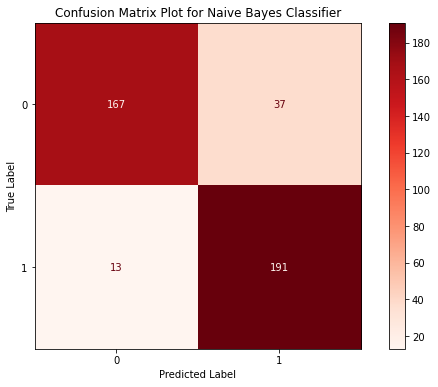

In [12]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [13]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


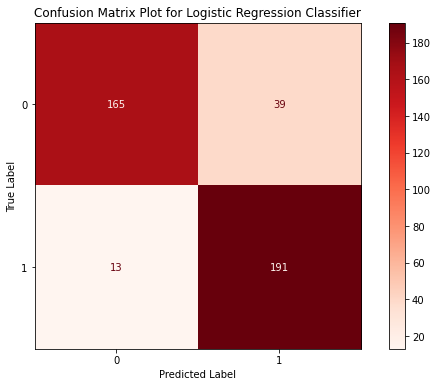

In [15]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = plot_confusion_matrix(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [16]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

##**Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


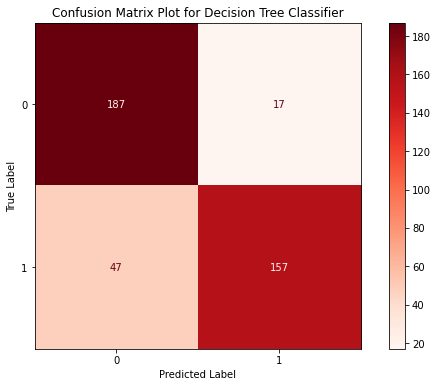

In [18]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [19]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


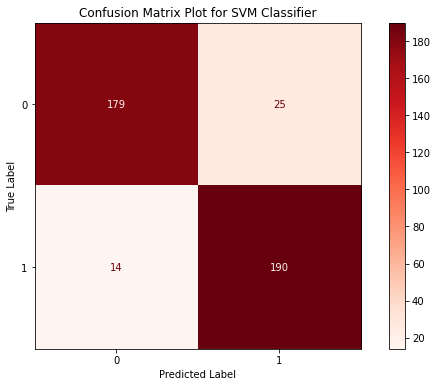

In [21]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [22]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


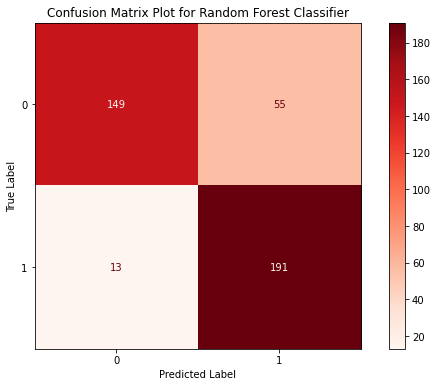

In [24]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [25]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[177  27]
 [ 16 188]]
0.8946078431372549
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       204
           1       0.87      0.92      0.90       204

    accuracy                           0.89       408
   macro avg       0.90      0.89      0.89       408
weighted avg       0.90      0.89      0.89       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


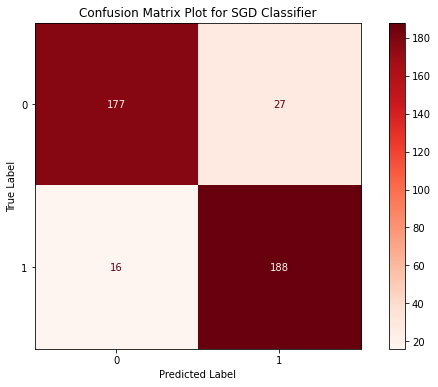

In [27]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [28]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [29]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


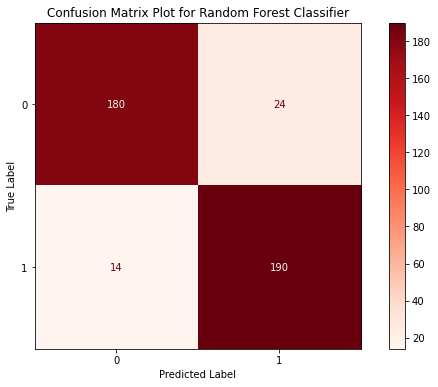

In [30]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [31]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 432x288 with 0 Axes>

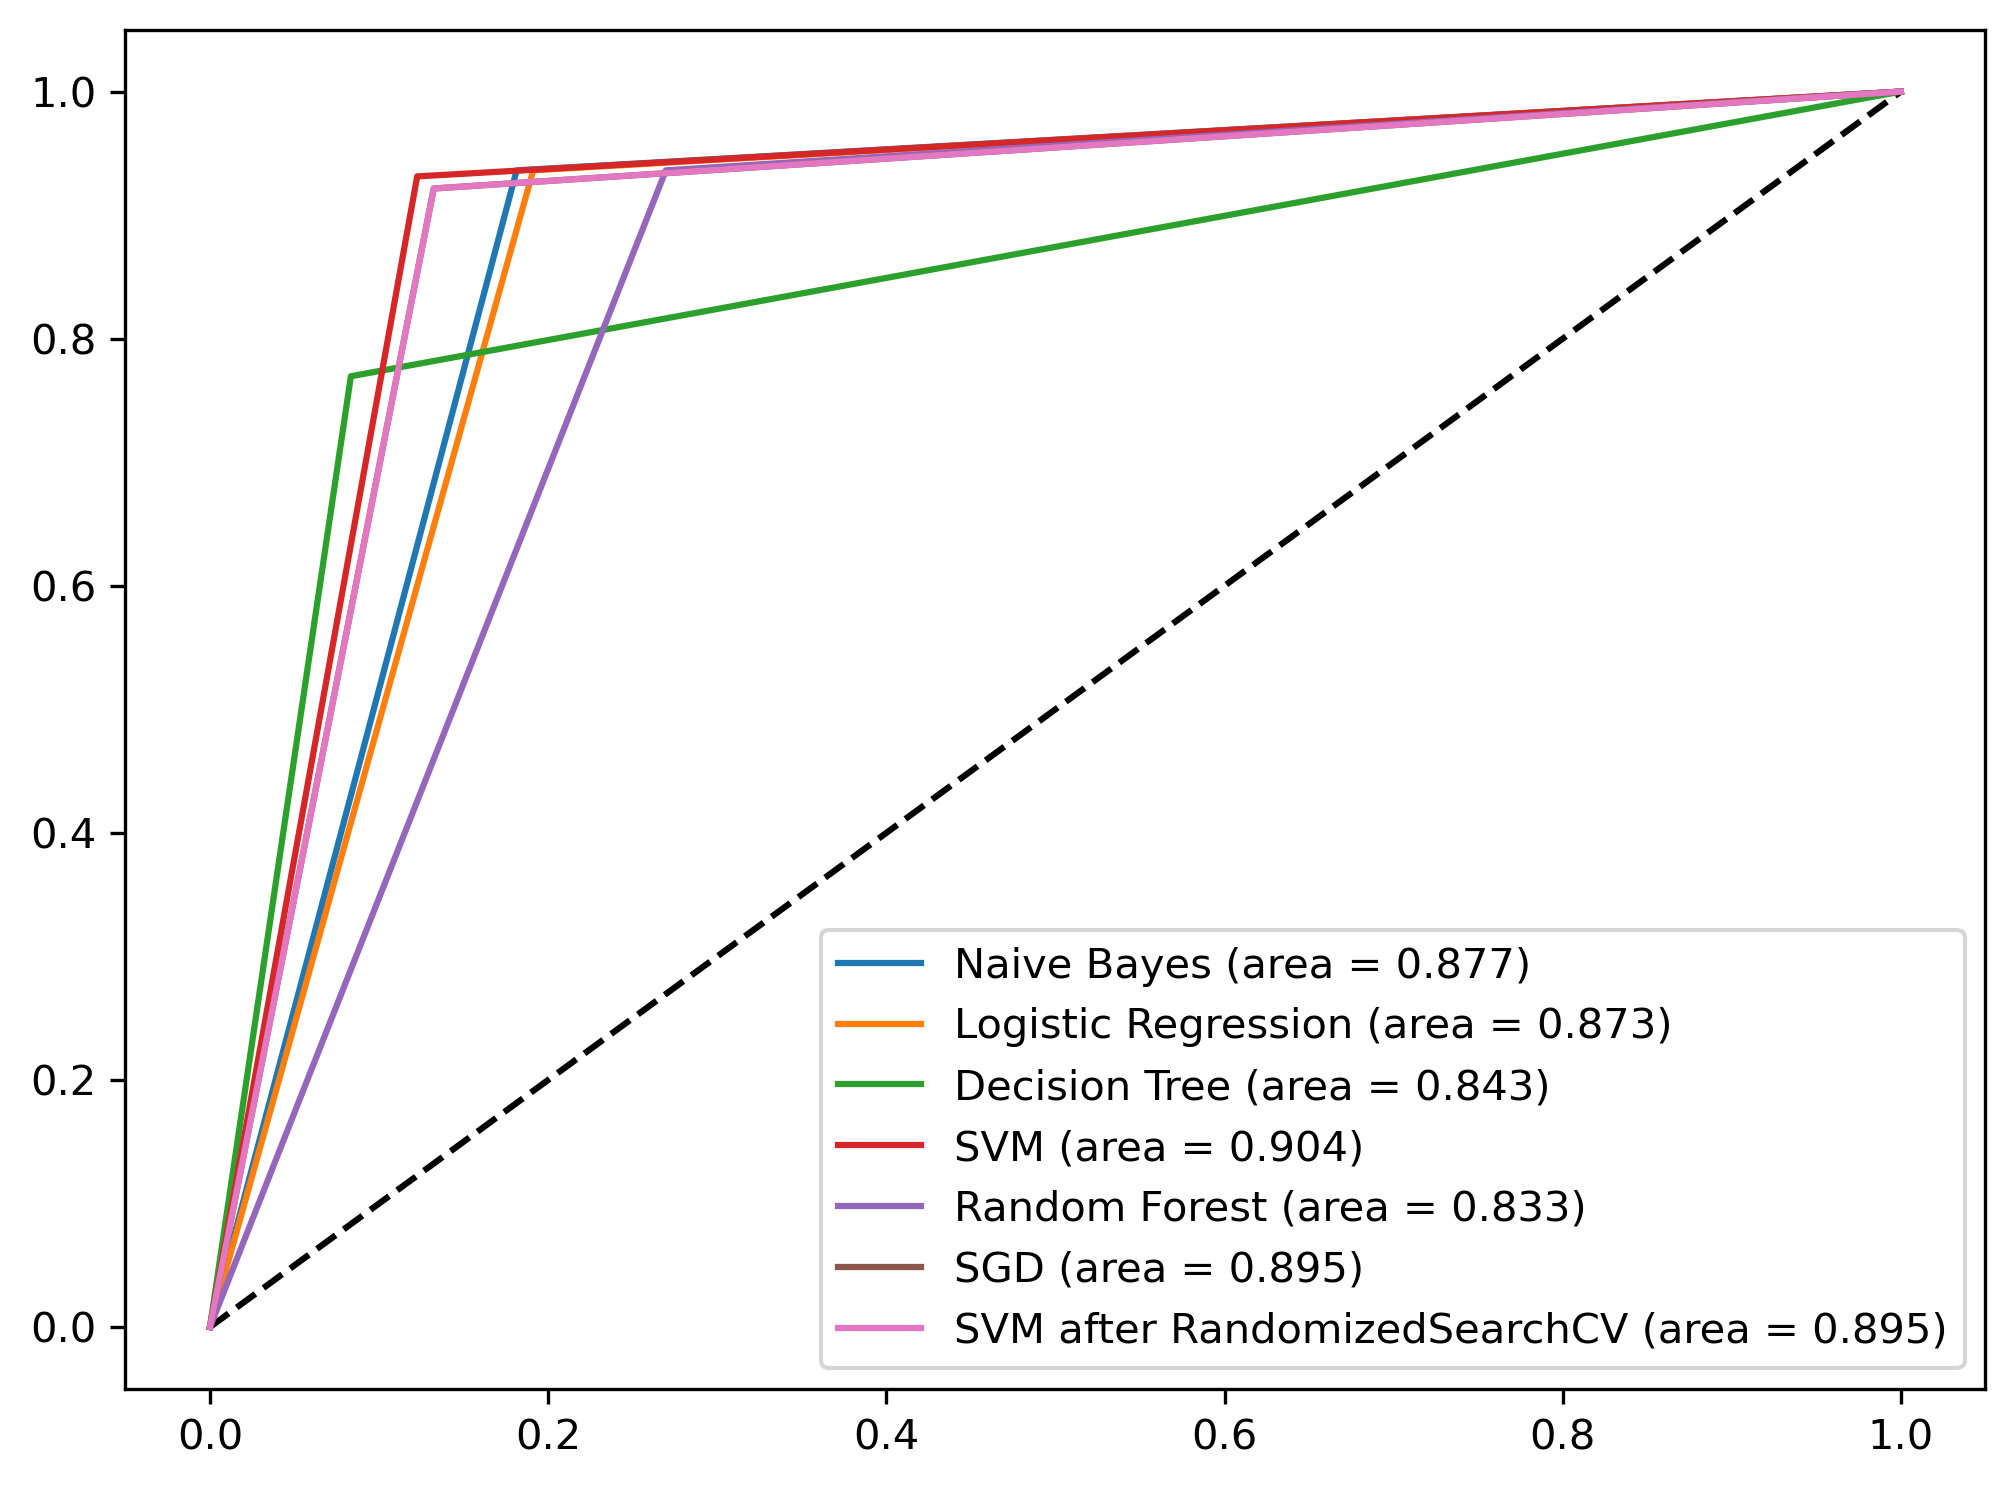

In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()

# DL starts

In [35]:
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
import collections
import nltk
import numpy as np
import codecs

In [58]:
np.random.seed(42)
INPUT_FILE = "ecommerce_dataset.txt"
VOCAB_SIZE = 10000
EMBED_SIZE = 300
NUM_FILTERS = 256
NUM_WORDS = 3
BATCH_SIZE = 256
NUM_EPOCHS = 100

In [37]:
print("Maximum number of word in a sentence: ",maxlen)
print("Frequency of each words: ")
counter

Maximum number of word in a sentence:  28
Frequency of each words: 


Counter({'অনেকগুলা': 1,
         'অরডার': 4,
         'একটু': 36,
         'দেখবেন': 2,
         'ভালোবাসা': 2,
         'রইল': 8,
         'ইভ্যালির': 4,
         'আগের': 7,
         'প্রডাক্ট': 51,
         'ক্লিয়ার': 1,
         'তারাতাড়ি': 2,
         'ভাল': 101,
         'লাগতেছে': 2,
         'না': 251,
         'দয়া': 3,
         'ভাই': 43,
         'পাবো': 14,
         'সঠিক': 10,
         'তারিখে': 12,
         'দিতেন': 1,
         'অভিযোগ': 8,
         'দিত': 2,
         'কমার্সের': 1,
         'নামে': 9,
         'আপনারা': 33,
         'মানুষের': 8,
         'সাথে': 34,
         'করতেছে': 3,
         'একদিন': 4,
         'হিসাব': 1,
         'আপনাদের': 101,
         'কড়ায়': 1,
         'ঘন্ডায়': 1,
         'ফাইজলামি!!': 1,
         'দীর্ঘ': 2,
         'হায়াত': 1,
         'কামনা': 11,
         'অডার': 9,
         'মত': 17,
         'টাকা': 55,
         'নাই': 74,
         'স্বপ্নের': 1,
         'খুবই': 66,
         'প্রয়োজনীয়': 3,
         'বাইকটা': 1,
         'পাব': 6

In [38]:
word2index = collections.defaultdict(int) 
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1

word2index  

defaultdict(int,
            {'ভালো': 1,
             'না': 2,
             'অর্ডার': 3,
             'প্রোডাক্ট': 4,
             'ডেলিভারি': 5,
             'সুন্দর': 6,
             'দাম': 7,
             'ভাল': 8,
             'আপনাদের': 9,
             'টা': 10,
             'ধন্যবাদ': 11,
             '': 12,
             'নাই': 13,
             'একটা': 14,
             'খুবই': 15,
             'বেশি': 16,
             'পেয়েছি': 17,
             'টাকা': 18,
             'পণ্য': 19,
             'আলহামদুলিল্লাহ': 20,
             'প্রডাক্ট': 21,
             'ঠিক': 22,
             'হাতে': 23,
             'কোয়ালিটি': 24,
             'কম': 25,
             'মান': 26,
             'ভাই': 27,
             'বাজে': 28,
             'এক': 29,
             'অসাধারণ': 30,
             'সার্ভিস': 31,
             'খারাপ': 32,
             'গুলো': 33,
             'জিনিস': 34,
             'এখনো': 35,
             'পেলাম': 36,
             'পন্য': 37,
             'দামে': 38,
            

In [39]:
vocab_sz = len(word2index) + 1
print("Number of Vocabularies: ",vocab_sz)

Number of Vocabularies:  3257


In [40]:
xs, ys = [], []
fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
    label, sent = line.strip().split("\t")
    
    words = tokenizer.word_tokenizer(sent)
    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    wordsExcludingStopWords=remove_stopwords(wordsExcludingPunctuationMarks, level='soft')
    
    wids = [word2index[word] for word in wordsExcludingStopWords]

    ys.append(int(label))
    xs.append(wids)
fin.close()

In [41]:
xs

[[1101, 365, 39, 663],
 [664, 176, 366, 0],
 [202, 21, 1102, 0, 665],
 [0, 8, 666],
 [474, 39, 0, 27, 0, 96],
 [139, 116, 1103, 0, 177, 667],
 [0, 1104, 157, 43, 0, 178, 42, 0, 475, 367, 1105, 9, 1106, 1107, 0],
 [1108],
 [668, 1109, 127, 0],
 [27, 0, 158, 0, 80, 18, 13, 0, 1110, 476, 1111, 234],
 [27, 1112, 1113, 203, 0, 1114, 159, 368],
 [0, 1115, 369, 1116, 1117, 0],
 [49, 0, 81, 669, 370, 1118, 1119, 62, 0, 72, 1120, 11],
 [27, 37, 33, 0, 1121],
 [1122, 0, 1123, 160, 0, 86, 97, 3],
 [21, 33, 235, 294, 27],
 [117, 1124, 13, 0, 670, 5, 1125],
 [43, 0, 477, 178, 478, 1126, 0, 479, 1127],
 [1128, 1129, 1130, 49, 90, 0, 1131, 480, 236],
 [0, 1132, 128, 1133, 0, 479, 11],
 [1134, 481, 0, 1135, 1136, 12],
 [1, 0, 1, 371, 370, 482],
 [161, 1137, 1138],
 [141, 1139, 1140, 1141, 369, 1142],
 [1143, 3, 33, 295, 0, 0, 39, 98, 483, 1144],
 [0, 3, 0, 671, 484, 1145, 19, 5, 1146],
 [178, 672, 18, 1147, 1148],
 [1149, 1150, 162, 673, 0, 0],
 [1151, 485, 0],
 [296, 486, 487, 296, 488, 0, 178, 1152]

In [42]:
X = pad_sequences(xs, maxlen=maxlen)
Y = np_utils.to_categorical(ys)

In [43]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(1223, 28) (408, 28) (1223, 2) (408, 2)


# LSTM

In [44]:
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization

#embedding_vector_features=40
modelLstm=Sequential()
modelLstm.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen,trainable=True))
modelLstm.add(LSTM(256,return_sequences=True))
modelLstm.add(Dropout(0.2))
modelLstm.add(LSTM(128))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(128,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(256,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(512,activation='relu'))
modelLstm.add(Dropout(0.2))
modelLstm.add(BatchNormalization())
modelLstm.add(Dense(2,activation='softmax'))

In [45]:
modelLstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(modelLstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 300)           977100    
                                                                 
 lstm (LSTM)                 (None, 28, 256)           570368    
                                                                 
 dropout (Dropout)           (None, 28, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [59]:
history = modelLstm.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest))

Epoch 1/100
5/5 [==============================] - 2s 332ms/step - loss: 0.0010 - accuracy: 0.9992 - val_loss: 1.2701 - val_accuracy: 0.8456
Epoch 2/100
5/5 [==============================] - 2s 325ms/step - loss: 8.9700e-04 - accuracy: 1.0000 - val_loss: 1.2710 - val_accuracy: 0.8456
Epoch 3/100
5/5 [==============================] - 2s 325ms/step - loss: 0.0012 - accuracy: 0.9992 - val_loss: 1.2717 - val_accuracy: 0.8456
Epoch 4/100
5/5 [==============================] - 2s 328ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 1.2716 - val_accuracy: 0.8456
Epoch 5/100
5/5 [==============================] - 2s 326ms/step - loss: 8.3742e-04 - accuracy: 0.9992 - val_loss: 1.2707 - val_accuracy: 0.8456
Epoch 6/100
5/5 [==============================] - 2s 360ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2697 - val_accuracy: 0.8456
Epoch 7/100
5/5 [==============================] - 2s 342ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2676 - val_accuracy: 0.8456
Epoch

5/5 [==============================] - 2s 433ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 1.2573 - val_accuracy: 0.8480
Epoch 59/100
5/5 [==============================] - 2s 442ms/step - loss: 0.0012 - accuracy: 0.9992 - val_loss: 1.2570 - val_accuracy: 0.8480
Epoch 60/100
5/5 [==============================] - 2s 463ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 1.2572 - val_accuracy: 0.8480
Epoch 61/100
5/5 [==============================] - 2s 430ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 1.2563 - val_accuracy: 0.8456
Epoch 62/100
5/5 [==============================] - 2s 409ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2558 - val_accuracy: 0.8456
Epoch 63/100
5/5 [==============================] - 2s 417ms/step - loss: 0.0025 - accuracy: 0.9984 - val_loss: 1.2558 - val_accuracy: 0.8456
Epoch 64/100
5/5 [==============================] - 2s 472ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 1.2539 - val_accuracy: 0.8456
Epoch 65/100
5/5 [=

In [60]:
y_pred=np.argmax(modelLstm.predict(Xtest), axis=-1)
y_pred

13/13 [==============================] - 0s 28ms/step


array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [61]:
Ytest

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [62]:
y_test=np.argmax(Ytest, axis=1)
y_test

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [63]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.8431372549019608
[[168  33]
 [ 31 176]]


# CNN

In [64]:
model = Sequential()
model.add(Embedding(vocab_sz, EMBED_SIZE, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=NUM_FILTERS,kernel_size=NUM_WORDS,activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation="softmax"))

In [65]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_data=(Xtest, Ytest))

Epoch 1/100
5/5 [==============================] - 1s 100ms/step - loss: 0.6830 - accuracy: 0.5413 - val_loss: 0.6688 - val_accuracy: 0.5319
Epoch 2/100
5/5 [==============================] - 0s 75ms/step - loss: 0.6341 - accuracy: 0.7285 - val_loss: 0.6240 - val_accuracy: 0.7721
Epoch 3/100
5/5 [==============================] - 0s 70ms/step - loss: 0.5630 - accuracy: 0.9052 - val_loss: 0.5672 - val_accuracy: 0.7672
Epoch 4/100
5/5 [==============================] - 0s 69ms/step - loss: 0.4679 - accuracy: 0.9125 - val_loss: 0.4879 - val_accuracy: 0.8162
Epoch 5/100
5/5 [==============================] - 0s 71ms/step - loss: 0.3534 - accuracy: 0.9338 - val_loss: 0.4155 - val_accuracy: 0.8333
Epoch 6/100
5/5 [==============================] - 0s 73ms/step - loss: 0.2455 - accuracy: 0.9460 - val_loss: 0.3687 - val_accuracy: 0.8456
Epoch 7/100
5/5 [==============================] - 0s 73ms/step - loss: 0.1594 - accuracy: 0.9665 - val_loss: 0.3397 - val_accuracy: 0.8627
Epoch 8/100
5/5 [==

5/5 [==============================] - 0s 94ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.4745 - val_accuracy: 0.8750
Epoch 60/100
5/5 [==============================] - 0s 98ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.4691 - val_accuracy: 0.8725
Epoch 61/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.4682 - val_accuracy: 0.8775
Epoch 62/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.4697 - val_accuracy: 0.8799
Epoch 63/100
5/5 [==============================] - 0s 94ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.4822 - val_accuracy: 0.8725
Epoch 64/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4873 - val_accuracy: 0.8725
Epoch 65/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.4831 - val_accuracy: 0.8725
Epoch 66/100
5/5 [========

In [67]:
y_pred=np.argmax(model.predict(Xtest), axis=-1)
y_test=np.argmax(Ytest, axis=1)

13/13 [==============================] - 0s 4ms/step


In [68]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

Accuracy:  0.875
[[171  30]
 [ 21 186]]
